In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{bm}']
sns.set_style('ticks')

In [2]:
f = np.load("results_endovis_fig.npz")
img = f['img']
target = f['target']
mu_test = f['mu_test']
err = f['err']
uncert = f['uncert']
uncert_s = f['uncert_s']

img = img.transpose(1,2,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


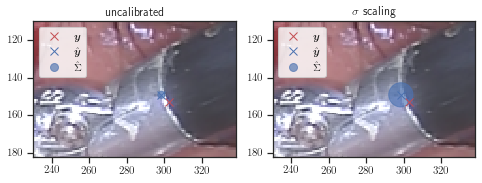

In [5]:
x = 230
y = 110
w = x+int(360*0.3)
h = y+int(288*0.25)

fig, ax = plt.subplots(1, 2, figsize=(6.8, 2.75))

ax[0].imshow(img+0.1)
ax[0].plot([target[0]*360],[target[1]*288], 'rx', label=r'$ \bm{y} $', markersize=8)
ax[0].plot([mu_test[0]*360],[mu_test[1]*288], 'bx', label=r'$ \hat{\bm{y}} $', markersize=8)
l = ax[0].plot(0, 0, 'bo', label=r'$ \hat{\Sigma} $', alpha=0.65, markersize=8)
circle0 = plt.Circle((mu_test[0]*360, mu_test[1]*288), uncert*360, color='b', fill=True, alpha=0.65)
ax[0].add_artist(circle0)
ax[0].grid(False)
ax[0].legend(loc='upper left')
l.pop(0).remove()
ax[0].set_title(r'uncalibrated')
ax[0].set_xlim(x, w)
ax[0].set_ylim(h, y)

ax[1].imshow(img+0.1)
ax[1].plot([target[0]*360],[target[1]*288], 'rx', label=r'$ \bm{y} $', markersize=8)
ax[1].plot([mu_test[0]*360],[mu_test[1]*288], 'bx', label=r'$ \hat{\bm{y}} $', markersize=8)
l = ax[1].plot(0, 0, 'bo', label=r'$ \hat{\Sigma} $', alpha=0.65, markersize=8)
circle1 = plt.Circle((mu_test[0]*360, mu_test[1]*288), uncert_s*360, color='b', fill=True, alpha=0.65)
ax[1].add_artist(circle1)
ax[1].grid(False)
ax[1].legend(loc='upper left')
l.pop(0).remove()
ax[1].set_title(r'$ \sigma $ scaling')
ax[1].set_xlim(x, w)
ax[1].set_ylim(h, y)

fig.tight_layout()
fig.show()
fig.savefig("endovis_results.pdf", bbox_inches='tight')